## 4.4 구간분할, 이산화 그리고 선형 모델, 트리 모델

* 어떤 모델을 사용하는지에 따라 달라짐
* 이산화 : 특성의 입력값 범위가 여러 구간 분할

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False
font_name = font_manager.FontProperties(fname= "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

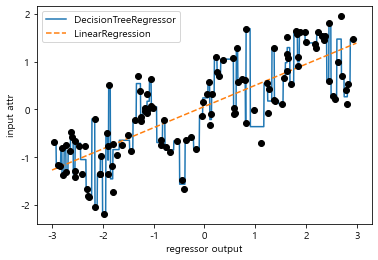

In [28]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.tree import DecisionTreeRegressor #결정트리

X, y = mglearn.datasets.make_wave(n_samples=120) #wave 데이터셋 가져옴
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1) #1000개구간
#reshape 형태 재배열

#리프노드가 되기 위한 최소의 샘플 개수 지정
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y) # 리프로드3개분할
plt.plot(line, reg.predict(line), label="DecisionTreeRegressor")

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label='LinearRegression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel('regressor output')
plt.ylabel('input attr')
plt.legend(loc='best')
plt.show()

* 연속형 데이터에 강력한 선형 모델을 만드는 방법은 한 특성을 여러 특성으로 나누는 구간 분할이다 (이산화)
* 선형은 특성이 하나면 직선으로 보인다(아래에 우리가 나눠본다)

In [29]:
from sklearn.preprocessing import KBinsDiscretizer

In [30]:
# 10개의 구간으로 나눔(-2.9668673~2.92132162)
# 첫 번째 구간 : -2.9668673 ~ -2.37804841
kb = KBinsDiscretizer(n_bins=10, strategy='uniform') 
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [31]:
# transform 메서드를 사용하면 각 데이터 포인트를 해당 구간으로 인코딩할수 있다.
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [32]:
print(X[:10])
X_binned.toarray()[:10]
#-0.75275929는 네번째 구간에 속합니다.(네번째 1이 있음)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

#### 원핫인코딩된 데이터로 선형 회귀 모델과 결정트리 모델

In [33]:
kb = KBinsDiscretizer(n_bins=10, strategy = 'uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, '입력 특성')

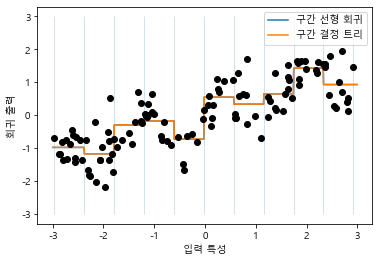

In [34]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')

#### 선형 모데른 wave 데이터 셋의 각 국간에 대해 상수값 학습
#### 학습된 기울기는 음수이고 모든 구간에 걸쳐 동일(x축 특성이 하나이므로 기울기도 하나)

* 선형회귀 모델과 결정트리가 같은 예측을 만들어 내서 파선과 실선이 완전히 겹침
* 각 구간 안에서 특성의 값이 상수이므로, 어떤 모델이든 그 구간의 포인트에 대해서느 같은 값을 예측
* 각 구간에서 다른 값을 가지고 있으므로 선형모델이 훨씬 유연
* 반면 결정 트리는 덜 유연
* 트리 모델은 데이터를 자유롭게 나눠 학습 할수 있으므로 특서의 값을 구간으로 나누는 것이 아무런 득이 되지 않음
* 일부 특성과 출력이 비선형 관계이지만, 용량이 매우 크고 고차원 데이터셋이라 선형모델을 사용한다면, 구간 분할이 모델 성능을 높이는데 아주 좋은 방법이 될 수 있다.
* 구간 분할이 모두 다 한테 좋은건 아니다.

## 4.5 상호작용과 다항식

### Wave 데이터셋을 이용한 모델을 비교
* 각 구간에서 다른 절편, 기울기를 학습한 선형회귀 모델 구성

In [35]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape) # 샘플데이터 120개에서 곱으로 해서 아까 10개였는데 20개 특성으로 늘림

(120, 20)


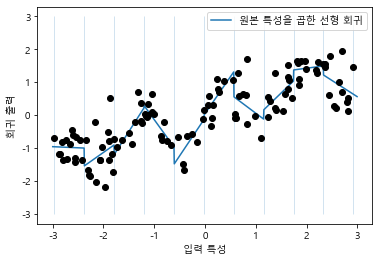

In [55]:
reg = LinearRegression().fit(X_product, y) # 선형구간으로 fit

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')
#특성의 곱을 추가했더니 더 잘보임

#### 구간별 기울기가 다른 선형회귀
* 각 구간에서 절편과 기울기가 모두 다름
* 구간 나누기는 연속형 특성을확장하는 방법중 하나
* 선형회귀가 조금더 잘 따라가고 있다.

### 이것 말고 상호작용 이라고 있다.

### 다항식 특성 영향
* preprocessing모듈의 PolynomialFeatures 사용

In [37]:
from sklearn.preprocessing import PolynomialFeatures

# X** 10까지 고차항을 추가합니다.
# 기본값인 include_bias(절편값) = True는 절편에 해당하는 1인 특성을 추가합니다.
poly = PolynomialFeatures(degree=10, include_bias=False) #10차항 까지 주겠다.
poly.fit(X)
X_poly = poly.transform(X)

In [38]:
print('X_poly.shape:', X_poly.shape)

X_poly.shape: (120, 10)


### 다항식 특성 영향
#### Wave 데이터셋을 이용한 모델 비교
* 10차원 특성 추출
* X_poly의 첫번째 열은 X와 같고 다른 열은 첫번째 열의 거듭 제곱

In [39]:
-0.75275929*-0.75275929 #X_ploy원소 두번째 값

0.566646548681304

In [40]:
-0.75275929*-0.75275929*-0.75275929 #X_ploy원소 세번째 값

-0.42654845366628885

In [41]:
print('X 원소:\n', X[:5]) #5개 데이터를 10차까지 봄
print('X_poly 원소:\n', X_poly[:5])

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


### 다항식 특성 영향
#### Wave 데이터셋을 이용한 모델 비교
* 10차 다항식을 이용한 회귀모델 구성
* 다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만듦
* 고차원 다항식은 데이터가 부족한 영역에서 민감하게 동작

In [42]:
print('항 이름:\n', poly.get_feature_names())

항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


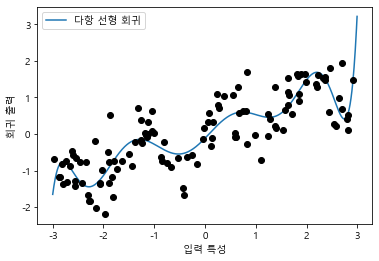

In [46]:
reg = LinearRegression().fit(X_poly, y) # 선형구간으로 fit

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

### 다항식 특성 영향
#### Wave 데이터셋을 이용한 모델 비교
* RBF 커널 SVM의 gamma 매개변수 변화에 따른 비교
* 더 복잡한 모델인 터널 SVM 을 사용해 특성 데이터를 변환하지 않고
* 다항 회귀와 비슷한 복잡도를 가진 예측을 만듦

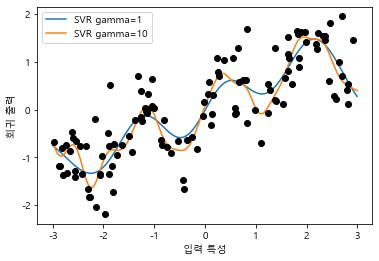

In [48]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

* 다항 선형 회귀랑 비교할때 다항 선형 회귀는 데이터 없는 부분에 민감하게 작용하는데 다항식을 추가하지 않고 svm을 통해 다항 회귀와 비슷한 예측을 만들수 있다. 특성 데이터를 변환하지 않고도

### 다항식 특성 영향
#### 보스턴 주택 가격 데이터셋을 이용한 다하식 특성 적용
* 스케일 조정 (MinMaxScaler)후 다항식 특성 추출

In [50]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                   random_state=0)

#데이터 스케일 조정 :0~1 사이로
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# degree 다항식 2차 적용
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_ploy = poly.transform(X_train_scaled) #변환된 데이터
X_test_ploy = poly.transform(X_test_scaled)
print('X_train.shape:', X_train.shape)
print('X_train_poly.shape:', X_train_ploy.shape)
#13개 feature가 105로 늘어남

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


#### 다항식 특성 확장
* 원래 특성 13개가 특성 조합으로 특성 곱 및 다항식 특성 추가하여 105개로 확장
* degree=2로 하면 원본 특성에서 두개를 뽑아 만들수 있는 모든 곱을 얻음

In [56]:
print('다항 특성 이름:\n', poly.get_feature_names())

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


#### 상호작용 특성 있는 데이터와 없는 데이터에 대한 릿지 회귀 결과
* 선형 모델은 영향을 받지만 랜덤 포레스트처럼 복잡한 모델은 차이없음

In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수: {:.3f}'.format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_ploy, y_train)
print('상호작용 특성이 있을 때 점수: {:.3f}'.format(ridge.score(X_test_ploy, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


* 상호작용 특성이 없을때는 우리보다 낮고, 있을때는 높다.
* 릿지모델은 상호작용 있을때랑 없을때랑 값이 차이가 난다 10몇프로 차이!

#### 다른 모델 불러와보자 (한개가지고 안되서 앙상블 불러오자 여러전문가가 내린것 RandomForest 는 최고의 결정은 아니다 디시즌은 최고의 결정이다.)

In [69]:
from sklearn.ensemble import RandomForestRegressor #나무 100개 만들어서(트리조정하며 스코어 높이려고 노력)
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled,y_train)
print('상호작용 특성이 없을때 점수: {:.3f}'. format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_ploy, y_train)
print('상호작용 특성이 없을때 점수: {:.3f}'. format(rf.score(X_test_ploy, y_test)))

상호작용 특성이 없을때 점수: 0.795
상호작용 특성이 없을때 점수: 0.775


* 특성을 추가하지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹음.
* 오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어든다.
* 제곱항이나 세제곱 항을 추가하면 선형 회귀모델에는 도움이 된다.

## 4.6 일변량 비선형 변환
### 실제 데이터 속성과 비슷한 랜덤 카운트 데이터 생성
* 특성 값 데이터는 모두 정수이며 3개의 특성은 실수<br>
트리기반은 특성 순서에 영향을 받고 선형 모델은 제곱항이나 세제곱 항 추가하는 것에 영향을 많이 받는다.

In [77]:
rnd = np.random.RandomState(0) #랜덤한 숫자 만들기
X_org = rnd.normal(size=(1000,3)) #1000개 만듦
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org)) #포아송 분포
y = np.dot(X_org, w)
print(X[:10,0]) # 앞에서 열개만 찍어보자 #X정수
print(y[:10]) # y 실수(타겟값)

[ 56  81  25  20  27  18  12  21 109   7]
[2.92614361 4.74436373 1.4394878  0.56962109 1.23092405 1.4048387
 0.30534339 1.61798577 2.78397106 0.40526824]


In [72]:
print('특성 출현 횟수:\n', np.bincount(X[:,0]))
#0이 28번 출현, 1이 38번 출현 , 앞부분 데이터가 많이 나타나고 뒷부분은 간혹 나타남

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


### 카운트 데이터를 사용한 일변량 비선형 변환
#### 트리 기반 모델은 특성의 순서에만 영향을 받지만, 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관
* 특성과 타깃값 사이에 비선형성이 있다면 특히 선형 회귀에서는 모델을 만들기가 어려움
* 대부분 모델은 각 특성이 정규분포(종모양)와 비슷할때 최고의 성능을 나타냄(확인하려고 한쪽에 데이터 치우치게 만들었음)
* 정수카운트 데이터의 히스토그램

Text(0.5, 0, '값')

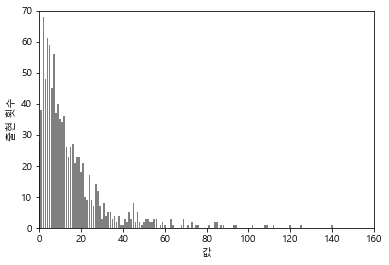

In [76]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color = 'grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

### 선형 릿지 회귀 적용
* 비교적 낮은 R2 점수 나옴 - Ridge는 제대로 모델링 하지 못함

In [79]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.622


### 로그 스케일로 데이터 변환 (한쪽으로 치우친 데이터여서 정규분포 만들기 위해)

* 0인 데이터를 위해 log(X) 대신 log(X+1)사용 
* log0이 무한대가 되기 때문에 X+1 해서 0을 막음
* 한쪽으로 치우친 데이터여서 정규분포 만들고 하려고 함

In [81]:
X_train_log = np.log(X_train +1)
X_test_log = np.log(X_test +1)

Text(0.5, 0, '값')

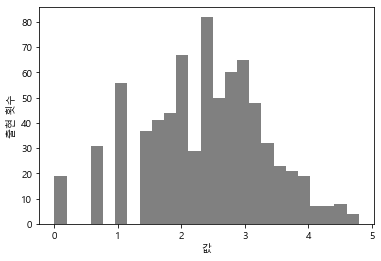

In [83]:
plt.hist(X_train_log[:,0], bins=25, color='gray')
plt.ylabel('출현 횟수')
plt.xlabel('값') # 정규분포 만들어짐

### 정규분포 만든 후 다시 선형 릿지 회귀 적용
* 이번에는 훨씬 좋은 결과가 나옴

In [84]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('테스트 점수 : {:.3f}'.format(score))

테스트 점수 : 0.875


#### 이런 데이터 변환은 선형 모델에서는 필수이지만 트리 모델에서는 불필요함
* 트리기반 모델은 스스로 중요한 상호작용을 찾아낼 수 있고 대부분의 경우 데이터를 명시적으로 변환하지 않아도 됨

#### 구간 분할, 다항식, 상호작용 등 데이터 변환의 모델 성능 영향 정도
* 선형 모델/나이브베이즈 > SVM,최근접이웃,신경망 > 트리기반 모델

* 모델과 특성과의 관계
트리기반 모델은 특성의 순서만 영향<br>
선형회귀와 신경망은 특성의 스케일과 분포에 밀접하게 연관<br>
대부분의 모델이 각 특성이 정규분포와 비슷할때 최고의 성능<br>
(log, exp 함수로 정규분포로 만들어줘야함)

## 4.7 특성 자동 선택

* 특성이 많아지면 모델은 더 복잡해지고 과대적합 가능성 증가
* 가장 유용한 특성만 선택하여 특성의 수를 줄임(일변량 통계, 모델 기반 선택,반복적 선택)

### 4.7.1 일변량 통계
각각의 특성과 타깃 사이의 통계적 관계 분석
분류에서는 분산분석에 해당
계산이 매우 빠르며 평가 모델을 만들 필요가 없음

#### 유방암 데이터셋에 분류 특성 선택 적용
* 의미없는 노이즈 특성을 데이터에 추가 -> 특성 줄여
* -> 결과:추가한 노이즈 특성은 거의 제거됨. 선택특성은 대부분 원본 특성임.

#### 사이킷 런에서 일변량 분석으로 특성을 선택하려면 
* 분류에서는 f_classif(기본값), 회귀 r_regression을 선택하여 테스트하고 계산된 p값 특성 제외 (하도록 임계값 조정)
* 임계값을 계산하는 방법<br>
    SelectKBest:고정된 K개 특성 선택, SelectPercentile:지정된 비율만큼 특성 선택

In [88]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif 
#지정된 비율SelectPercentile만큼/분류f_classif
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

#고정된 난수를 발생시킵니다.
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50)) #의미없는 데이터noise
#데이터에 노이즈 특성을 추가합니다.
#처음 30개는 원본 특성이고 다음 50개는 노이즈 입니다.
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
X_w_noise, cancer.target, random_state=0, test_size=.5)

#f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다.
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

#훈련세트에 적용합니다.
X_train_selected = select.transform(X_train)

print('X_train.shape:', X_train.shape)
print('X_train_selected.shape:', X_train_selected.shape) 
# 80개의 특성이였는데 50%만선택하여 40개 특성으로 바뀜

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


* 특성이 80 --> 40개로 줄어듬.
* Get_support()메소드는 선택 특성을 불리언 값으로 표시

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x223aa7b6a90>], [Text(0, 0, '')])

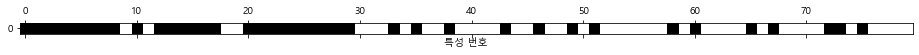

In [90]:
mask = select.get_support()
print(mask)
#True는 사용됨.검은색, False는 사용되지 않음.흰색으로 마스킹 합니다.
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0]) 
#원본데이터는 거의 사용되었는데 노이즈로 임의로 추가된건 사용되지 않음(뒷부분)

* 선택 특성은 대부분 원본 특성이며 노이즈 특성이 거의 제거됨

### 유방암 데이터 셋에 분류 특성 선택 적용

#### 전체 특성 이용 경우와 선택특성 이용 경우의 로지스틱 회귀 성능 비교
* 노이즈 특성 제거 했을때 성능이 우수

In [100]:
from sklearn.linear_model import LogisticRegression

#테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000) #5000번 반복

lr.fit(X_train, y_train)
print('전체 특성을 사용한 점수:{:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('선택된 일부 특성을 사용한 점수:{:.3f}'.format(
    lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수:0.947
선택된 일부 특성을 사용한 점수:0.933


### 4.7.2 모델 기반 특성 선택
특성 중요도 평가하고 가장 중요한 특성들만 선택
결정트리 기반 모델은 각 특성의 중요도가 담겨진 feature_importances_속성제공
임계치보다 큰 모든 특성 선택

### 유방암 데이터셋에 대한 모델 기반 특성 선택 (특성중요도계산)
* 모델 기반 특성 선택은 SelectFromModel클래스 사용

In [103]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median')

* 일변량 분석 특성 선택과 비교 위해 중간값을 임게치로 선택
* 트리 100개로 만든 랜덤 포레스트 분류기로 특성 중요도 계산

In [105]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape:', X_train.shape) 
#원래 유방암 데이터 feature 30개인데 50개 추가했다.
#그중에 40개만 선택
print('X_train_l1.shape:', X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


### 선택 특성 시각화
* 2개를 제외한 모든 원본 특성 선택

([<matplotlib.axis.YTick at 0x223aa82aee0>], [Text(0, 0, '')])

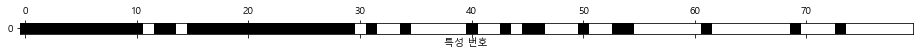

In [106]:
mask = select.get_support()
#True는 검은색, False는 흰색으로 마스킹 합니다.
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])

* 일변량 통계 방식에 비해 성능이 향상 되었음.

In [110]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).\
score(X_test_l1, y_test)

print('테스트 점수 :{:.3f}'.format(score))
# 93프로 보다는 향상되었다. 전체 보다는 작아졌고

테스트 점수 :0.947


### 4.7.3 반복적 특성 선택
특성수가 각각 다른 일련의 모델을 순차적으로 생성<br><br>

* 2가지 기본 모델 생성방식<br>
1.하나씩 추가하는 방법<br>
2.하나씩 제거하는 방법(모든특성으로 시작해서 종료조건에 도달할때 까지)

### 유방암 데이터셋에 RFE  (재귀적인 특성 제거한다.) 적용
#### 랜덤 포레스트 분류 모델 사용
* 1개를 제외한 모든 원본 특성 선택
* 모든 특성으로 시작해서 모델을 만들고 중요도가 가장 낮은 특성을 제거(반복적으로)
* 재귀적인 특성 제거는 비용이 많이 듦

([<matplotlib.axis.YTick at 0x223a82a1370>], [Text(0, 0, '')])

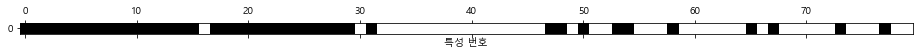

In [111]:
# 앞의 방법들은 특성을 하나도 선택하지 않은 상태에서 하나하나 선택하는것
# 모든것을 선택하여 하나식 제거하는 방법 -> 앞의 것보다 비용이 많이든다.
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
            n_features_to_select=40)

select.fit(X_train, y_train)
#선택된 특성을 표시합니다. 
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])

#### 유방암 데이터셋에 대한 RFE 적용
* 로지스틱회귀의 정확도 확인

In [112]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).\
score(X_test_rfe, y_test)

print('테스트 점수 :{:.3f}'.format(score))

테스트 점수 :0.940


* RFE에 사용된 모델(랜덤포레스트)에도 성능 확인

In [114]:
print('테스트 점수 :{:.3f}'.format(select.score(X_test, y_test)))

테스트 점수 :0.951


* 특성공학 : 특정 애플리케이션에 가장 적합한 데이터 찾는것